# Transformer For TimeSeries Forecasting Multivariate series 1 Testset (co2)

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_5_keras_transformers.ipynb

https://keras.io/examples/timeseries/

# Libraries

In [1]:
#!pip install optuna

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import optuna
import matplotlib.pyplot as plt
import os
from keras.models import load_model
#%tensorflow_version 2.x

# Data

In [3]:
df = pd.read_csv('DataSets /WORLD-OWID-Features-Monthly')
df.set_index('year', inplace=True)
df

,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
year,,,,,,,,
1880-01-01,0.00000,853.705000,838.340000,256.309556,1814.698707,3100.721000,15.364000,82.069576
1880-02-01,0.00000,856.096667,840.575167,256.309556,1814.698707,3100.405500,15.520500,82.069576
1880-03-01,0.00000,858.488333,842.810333,256.309556,1814.698707,3100.090000,15.677000,82.069576
1880-04-01,0.00000,860.880000,845.045500,256.309556,1814.698707,3099.774500,15.833500,82.069576
1880-05-01,0.00000,863.271667,847.280667,256.309556,1814.698707,3099.459000,15.990000,82.069576
...,...,...,...,...,...,...,...,...
2020-09-01,1660.90700,37116.969833,14711.253333,413.545333,7799.983333,3978.615333,11622.042333,296.198000
2020-10-01,1663.82825,37118.690375,14778.339500,414.290500,7830.445000,3968.722500,11675.821500,296.185000
2020-11-01,1666.74950,37120.410917,14845.425667,415.035667,7860.906667,3958.829667,11729.600667,296.172000


As we can see tha value of 2020 is an outlier compared to the other years because of corona... We will change this value with the mean of 2019 and 2021 combined. This way our future predictions/foreastings will be more accurate. 

In [4]:
#mean_co2 = df.loc[[2019, 2021], 'co2'].mean()
#df.loc[2020, 'co2'] = mean_co2

#df.tail(5)

##   Already done when turning yearly into monthly  !!!!!

# Defining our train, test & val set

In [5]:
train_set = df[(df.index <= '2000-01-01')]
test_set = df[(df.index > '2000-01-01')]

print("Train set:")
print(train_set.index.min(), "to", train_set.index.max())

print("Test set:")
print(test_set.index.min(), "to", test_set.index.max())

Train set:
1880-01-01 to 2000-01-01
Test set:
2000-02-01 to 2021-01-01


In [6]:
train_data = [train_set[column].tolist() for column in train_set.columns]
test_data = [test_set[column].tolist() for column in test_set.columns]
# val_data = [validate_set[column].tolist() for column in validate_set.columns]

# defining our Window/LookBack length





In [7]:
import numpy as np

def to_sequences(seq_size, obs_list):
    x = []
    y = []

    for i in range(len(obs_list[0]) - seq_size):
        window = [obs[i:i + seq_size] for obs in obs_list]
        after_window = [obs[i + seq_size] for obs in obs_list]
        x.append(window)
        y.append(after_window)

    return np.array(x), np.array(y)

SEQUENCE_SIZE = 5

train_data = [train_set[column].tolist() for column in train_set.columns]
test_data = [test_set[column].tolist() for column in test_set.columns]
#val_data = [validate_set[column].tolist() for column in validate_set.columns]

x_train, y_train = to_sequences(SEQUENCE_SIZE, train_data)
x_test, y_test = to_sequences(SEQUENCE_SIZE, test_data)
#x_val, y_val = to_sequences(SEQUENCE_SIZE, val_data)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))
#print("Shape of val set: {}".format(x_val.shape))


Shape of training set: (1436, 8, 5)
Shape of test set: (247, 8, 5)


# Scaling Data

In [8]:
'''train_data = np.log(train_data)
test_data = np.log(test_data)
val_data = np.log(val_data)'''

'train_data = np.log(train_data)\ntest_data = np.log(test_data)\nval_data = np.log(val_data)'

In [9]:
'''from sklearn.preprocessing import StandardScaler

# Maak een scaler voor de kenmerken (X)
feature_scaler = StandardScaler()
X_train_scaled = feature_scaler.fit_transform(x_train)
X_test_scaled = feature_scaler.transform(x_test)
X_val_scaled = feature_scaler.transform(x_val)

# Maak een scaler voor de doelvariabelen (y)
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)
y_val_scaled = target_scaler.transform(y_val)'''


'from sklearn.preprocessing import StandardScaler\n\n# Maak een scaler voor de kenmerken (X)\nfeature_scaler = StandardScaler()\nX_train_scaled = feature_scaler.fit_transform(x_train)\nX_test_scaled = feature_scaler.transform(x_test)\nX_val_scaled = feature_scaler.transform(x_val)\n\n# Maak een scaler voor de doelvariabelen (y)\ntarget_scaler = StandardScaler()\ny_train_scaled = target_scaler.fit_transform(y_train)\ny_test_scaled = target_scaler.transform(y_test)\ny_val_scaled = target_scaler.transform(y_val)'

# Metrics Helper Function

In [10]:
def print_metrics(pred, y_test, model_name):
    mae_ = mean_absolute_error(pred, y_test)
    rmse_ = np.sqrt(mean_squared_error(pred, y_test))
    mape_ = mean_absolute_percentage_error(pred, y_test)
    r2_score_ = r2_score(pred, y_test)

    dict_ = {
        'MAE': mae_,
        'RMSE': rmse_,
        'MAPE': mape_,
        'R2': r2_score_
    }

    metrics = pd.DataFrame(dict_, index=[model_name])

    return metrics.round(decimals=2)

# Building the Transformer Model

In [11]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)    #!! 
    return x + res

In [12]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="linear")(x)
        x = layers.Dropout(mlp_dropout)(x)
    x = layers.Dense(16)(x)
    outputs = layers.Dense(8)(x)
    return keras.Model(inputs, outputs)

# Using Optuna for Optimal Paramater search



In [13]:
def objective(trial):

  input_shape = x_train.shape[1:]

  head_size = trial.suggest_int("head_size", 64, 256)
  num_heads = trial.suggest_int("num_heads", 4, 8)
  ff_dim = trial.suggest_int("ff_dim", 8, 24)
  num_transformer_blocks = trial.suggest_int("num_transformer_blocks", 4, 8)
  mlp_units = [trial.suggest_int("mlp_units", 64, 128)]
  mlp_dropout = trial.suggest_float("mlp_dropout", 0.1, 0.35)
  dropout = trial.suggest_float("dropout", 0.1, 0.35)
  learning_rate = trial.suggest_float("learning_rate", 1e-6, 1e-3, log=True)
  n_epochs = trial.suggest_int("n_epochs", 64, 200)
  #batch_size = trial.suggest_int("batch_size", 16, 128, step=16)

  model = build_model(
      input_shape,
      head_size=head_size,
      num_heads=num_heads,
      ff_dim=ff_dim,
      num_transformer_blocks=num_transformer_blocks,
      mlp_units=mlp_units,
      mlp_dropout=mlp_dropout,
      dropout=dropout,
  )

  model.compile(
      loss="mean_absolute_error",
      optimizer=keras.optimizers.legacy.Adam(learning_rate=learning_rate)
  )
  model.summary()

  callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

  model.fit(
      x_train,
      y_train,
      validation_split=0.15,
      epochs=n_epochs,
      batch_size=64,
      callbacks=callbacks,
  )

  loss = model.evaluate(x_test, y_test, verbose=1)
  return loss

In [14]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2023-08-16 16:44:31,137] A new study created in memory with name: no-name-334c5d5d-6b2a-4730-bedb-6d3d2c4254a0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 8, 5)                 10        ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 8, 5)                 22453     ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

[I 2023-08-16 16:45:22,301] Trial 0 finished with value: 1294.032470703125 and parameters: {'head_size': 122, 'num_heads': 8, 'ff_dim': 23, 'num_transformer_blocks': 4, 'mlp_units': 125, 'mlp_dropout': 0.10044333051974799, 'dropout': 0.2588344397399829, 'learning_rate': 5.168877234235836e-05, 'n_epochs': 163}. Best is trial 0 with value: 1294.032470703125.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_8 (Lay  (None, 8, 5)                 10        ['input_2[0][0]']             
 erNormalization)                                                                                 
                                                                                                  
 multi_head_attention_4 (Mu  (None, 8, 5)                 13368     ['layer_normalization_8[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_8[0][0]
                                                                    ']                      

[I 2023-08-16 16:46:11,985] Trial 1 finished with value: 12303.41015625 and parameters: {'head_size': 83, 'num_heads': 7, 'ff_dim': 16, 'num_transformer_blocks': 6, 'mlp_units': 71, 'mlp_dropout': 0.1918807652624585, 'dropout': 0.26468056009909036, 'learning_rate': 2.7045490632128686e-06, 'n_epochs': 72}. Best is trial 0 with value: 1294.032470703125.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_20 (La  (None, 8, 5)                 10        ['input_3[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_10 (M  (None, 8, 5)                 22545     ['layer_normalization_20[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_20

[I 2023-08-16 16:47:19,728] Trial 2 finished with value: 1333.9058837890625 and parameters: {'head_size': 140, 'num_heads': 7, 'ff_dim': 20, 'num_transformer_blocks': 8, 'mlp_units': 101, 'mlp_dropout': 0.3035796771926379, 'dropout': 0.1385924664607595, 'learning_rate': 8.748067918463609e-05, 'n_epochs': 65}. Best is trial 0 with value: 1294.032470703125.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_36 (La  (None, 8, 5)                 10        ['input_4[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_18 (M  (None, 8, 5)                 26892     ['layer_normalization_36[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_36

[I 2023-08-16 16:49:15,738] Trial 3 finished with value: 2364.010009765625 and parameters: {'head_size': 167, 'num_heads': 7, 'ff_dim': 16, 'num_transformer_blocks': 5, 'mlp_units': 118, 'mlp_dropout': 0.1137610312106131, 'dropout': 0.1727810377371068, 'learning_rate': 1.3569089341209295e-05, 'n_epochs': 152}. Best is trial 0 with value: 1294.032470703125.


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_46 (La  (None, 8, 5)                 10        ['input_5[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_23 (M  (None, 8, 5)                 22200     ['layer_normalization_46[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_46

[I 2023-08-16 16:51:27,497] Trial 4 finished with value: 8521.4755859375 and parameters: {'head_size': 193, 'num_heads': 5, 'ff_dim': 23, 'num_transformer_blocks': 5, 'mlp_units': 99, 'mlp_dropout': 0.13774297001567828, 'dropout': 0.22243986524532755, 'learning_rate': 1.3213070957287278e-06, 'n_epochs': 188}. Best is trial 0 with value: 1294.032470703125.


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_56 (La  (None, 8, 5)                 10        ['input_6[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_28 (M  (None, 8, 5)                 7273      ['layer_normalization_56[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_56

[I 2023-08-16 16:52:10,710] Trial 5 finished with value: 6085.98095703125 and parameters: {'head_size': 79, 'num_heads': 4, 'ff_dim': 22, 'num_transformer_blocks': 6, 'mlp_units': 77, 'mlp_dropout': 0.28459438758316813, 'dropout': 0.3356670292592307, 'learning_rate': 1.4606844924500637e-06, 'n_epochs': 75}. Best is trial 0 with value: 1294.032470703125.


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_68 (La  (None, 8, 5)                 10        ['input_7[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_34 (M  (None, 8, 5)                 19739     ['layer_normalization_68[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_68

[I 2023-08-16 16:53:49,902] Trial 6 finished with value: 1876.0277099609375 and parameters: {'head_size': 143, 'num_heads': 6, 'ff_dim': 13, 'num_transformer_blocks': 6, 'mlp_units': 121, 'mlp_dropout': 0.3294229808542499, 'dropout': 0.24716197248647304, 'learning_rate': 1.9553274486835937e-05, 'n_epochs': 134}. Best is trial 0 with value: 1294.032470703125.


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_80 (La  (None, 8, 5)                 10        ['input_8[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_40 (M  (None, 8, 5)                 8469      ['layer_normalization_80[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_80

[I 2023-08-16 16:54:36,818] Trial 7 finished with value: 4985.630859375 and parameters: {'head_size': 92, 'num_heads': 4, 'ff_dim': 21, 'num_transformer_blocks': 4, 'mlp_units': 87, 'mlp_dropout': 0.20709031895709212, 'dropout': 0.1983283487954779, 'learning_rate': 8.024461055875242e-06, 'n_epochs': 114}. Best is trial 0 with value: 1294.032470703125.


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_88 (La  (None, 8, 5)                 10        ['input_9[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_44 (M  (None, 8, 5)                 22890     ['layer_normalization_88[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_88

[I 2023-08-16 16:55:08,289] Trial 8 finished with value: 2131.491943359375 and parameters: {'head_size': 199, 'num_heads': 5, 'ff_dim': 21, 'num_transformer_blocks': 4, 'mlp_units': 65, 'mlp_dropout': 0.15110437742344196, 'dropout': 0.19301094374435301, 'learning_rate': 9.517577525016992e-05, 'n_epochs': 96}. Best is trial 0 with value: 1294.032470703125.


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_96 (La  (None, 8, 5)                 10        ['input_10[0][0]']            
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_48 (M  (None, 8, 5)                 18221     ['layer_normalization_96[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_96

[I 2023-08-16 16:56:43,443] Trial 9 finished with value: 2643.272216796875 and parameters: {'head_size': 132, 'num_heads': 6, 'ff_dim': 24, 'num_transformer_blocks': 7, 'mlp_units': 124, 'mlp_dropout': 0.34685830428035924, 'dropout': 0.2011384730383074, 'learning_rate': 1.3855772559918511e-05, 'n_epochs': 109}. Best is trial 0 with value: 1294.032470703125.


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_110 (L  (None, 8, 5)                 10        ['input_11[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_55 (M  (None, 8, 5)                 46005     ['layer_normalization_110[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 16:57:38,065] Trial 10 finished with value: 895.7382202148438 and parameters: {'head_size': 250, 'num_heads': 8, 'ff_dim': 9, 'num_transformer_blocks': 4, 'mlp_units': 111, 'mlp_dropout': 0.10027779492932605, 'dropout': 0.2928629154004858, 'learning_rate': 0.0006996251508671432, 'n_epochs': 190}. Best is trial 10 with value: 895.7382202148438.


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_118 (L  (None, 8, 5)                 10        ['input_12[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_59 (M  (None, 8, 5)                 46373     ['layer_normalization_118[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 16:58:07,697] Trial 11 finished with value: 938.586669921875 and parameters: {'head_size': 252, 'num_heads': 8, 'ff_dim': 8, 'num_transformer_blocks': 4, 'mlp_units': 108, 'mlp_dropout': 0.10331353153207999, 'dropout': 0.30061770341830923, 'learning_rate': 0.0008979855084808416, 'n_epochs': 197}. Best is trial 10 with value: 895.7382202148438.


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_126 (L  (None, 8, 5)                 10        ['input_13[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_63 (M  (None, 8, 5)                 46741     ['layer_normalization_126[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 16:58:28,321] Trial 12 finished with value: 845.5035400390625 and parameters: {'head_size': 254, 'num_heads': 8, 'ff_dim': 8, 'num_transformer_blocks': 5, 'mlp_units': 113, 'mlp_dropout': 0.16544108961239506, 'dropout': 0.313133413557173, 'learning_rate': 0.0009594903526381891, 'n_epochs': 198}. Best is trial 12 with value: 845.5035400390625.


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_136 (L  (None, 8, 5)                 10        ['input_14[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_68 (M  (None, 8, 5)                 44165     ['layer_normalization_136[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 16:58:44,618] Trial 13 finished with value: 986.80615234375 and parameters: {'head_size': 240, 'num_heads': 8, 'ff_dim': 8, 'num_transformer_blocks': 5, 'mlp_units': 112, 'mlp_dropout': 0.16772055415894435, 'dropout': 0.33709598324331574, 'learning_rate': 0.0008687000377077636, 'n_epochs': 175}. Best is trial 12 with value: 845.5035400390625.


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_146 (L  (None, 8, 5)                 10        ['input_15[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_73 (M  (None, 8, 5)                 41037     ['layer_normalization_146[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 16:59:30,816] Trial 14 finished with value: 1094.1221923828125 and parameters: {'head_size': 223, 'num_heads': 8, 'ff_dim': 11, 'num_transformer_blocks': 5, 'mlp_units': 89, 'mlp_dropout': 0.24039131960996263, 'dropout': 0.30180120323895326, 'learning_rate': 0.00029249579359547084, 'n_epochs': 179}. Best is trial 12 with value: 845.5035400390625.


Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_156 (L  (None, 8, 5)                 10        ['input_16[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_78 (M  (None, 8, 5)                 34620     ['layer_normalization_156[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 17:00:00,334] Trial 15 finished with value: 1233.6309814453125 and parameters: {'head_size': 215, 'num_heads': 7, 'ff_dim': 12, 'num_transformer_blocks': 5, 'mlp_units': 108, 'mlp_dropout': 0.13271289536229092, 'dropout': 0.29460374269419676, 'learning_rate': 0.0003230045806324201, 'n_epochs': 198}. Best is trial 12 with value: 845.5035400390625.


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_166 (L  (None, 8, 5)                 10        ['input_17[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_83 (M  (None, 8, 5)                 46925     ['layer_normalization_166[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 17:01:49,886] Trial 16 finished with value: 938.3599243164062 and parameters: {'head_size': 255, 'num_heads': 8, 'ff_dim': 10, 'num_transformer_blocks': 7, 'mlp_units': 114, 'mlp_dropout': 0.17324804970605878, 'dropout': 0.336179712343327, 'learning_rate': 0.00032888987846491254, 'n_epochs': 149}. Best is trial 12 with value: 845.5035400390625.


Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_180 (L  (None, 8, 5)                 10        ['input_18[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_90 (M  (None, 8, 5)                 29146     ['layer_normalization_180[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 17:02:12,357] Trial 17 finished with value: 870.4815673828125 and parameters: {'head_size': 181, 'num_heads': 7, 'ff_dim': 14, 'num_transformer_blocks': 4, 'mlp_units': 105, 'mlp_dropout': 0.15183822884174442, 'dropout': 0.10115130646855976, 'learning_rate': 0.0008910410552458527, 'n_epochs': 167}. Best is trial 12 with value: 845.5035400390625.


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_188 (L  (None, 8, 5)                 10        ['input_19[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_94 (M  (None, 8, 5)                 27858     ['layer_normalization_188[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 17:02:45,849] Trial 18 finished with value: 1415.5924072265625 and parameters: {'head_size': 173, 'num_heads': 7, 'ff_dim': 14, 'num_transformer_blocks': 5, 'mlp_units': 90, 'mlp_dropout': 0.22793713295754092, 'dropout': 0.12099063341112579, 'learning_rate': 0.00017857383378345145, 'n_epochs': 166}. Best is trial 12 with value: 845.5035400390625.


Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_198 (L  (None, 8, 5)                 10        ['input_20[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_99 (M  (None, 8, 5)                 14495     ['layer_normalization_198[0][0
 ultiHeadAttention)                                                 ]',                           
                                                                     'layer_normalization_1

[I 2023-08-16 17:03:08,204] Trial 19 finished with value: 826.89697265625 and parameters: {'head_size': 105, 'num_heads': 6, 'ff_dim': 18, 'num_transformer_blocks': 7, 'mlp_units': 103, 'mlp_dropout': 0.16404481058556958, 'dropout': 0.10857267405799768, 'learning_rate': 0.0005181493936545735, 'n_epochs': 137}. Best is trial 19 with value: 826.89697265625.


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_212 (L  (None, 8, 5)                 10        ['input_21[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_106 (  (None, 8, 5)                 11965     ['layer_normalization_212[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:03:50,661] Trial 20 finished with value: 1180.4874267578125 and parameters: {'head_size': 104, 'num_heads': 5, 'ff_dim': 18, 'num_transformer_blocks': 7, 'mlp_units': 94, 'mlp_dropout': 0.19214655971356415, 'dropout': 0.1639271862860279, 'learning_rate': 0.00014534984533241683, 'n_epochs': 135}. Best is trial 19 with value: 826.89697265625.


Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_22 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_226 (L  (None, 8, 5)                 10        ['input_22[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_113 (  (None, 8, 5)                 15599     ['layer_normalization_226[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:04:14,405] Trial 21 finished with value: 1080.125732421875 and parameters: {'head_size': 113, 'num_heads': 6, 'ff_dim': 18, 'num_transformer_blocks': 8, 'mlp_units': 104, 'mlp_dropout': 0.15645057915078253, 'dropout': 0.10228637412287699, 'learning_rate': 0.0005444831356127258, 'n_epochs': 148}. Best is trial 19 with value: 826.89697265625.


Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_242 (L  (None, 8, 5)                 10        ['input_23[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_121 (  (None, 8, 5)                 9251      ['layer_normalization_242[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:04:43,909] Trial 22 finished with value: 992.69482421875 and parameters: {'head_size': 67, 'num_heads': 6, 'ff_dim': 18, 'num_transformer_blocks': 7, 'mlp_units': 104, 'mlp_dropout': 0.13640571515174382, 'dropout': 0.10422147080080481, 'learning_rate': 0.000978358208960888, 'n_epochs': 166}. Best is trial 19 with value: 826.89697265625.


Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_256 (L  (None, 8, 5)                 10        ['input_24[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_128 (  (None, 8, 5)                 28824     ['layer_normalization_256[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:05:14,341] Trial 23 finished with value: 802.0839233398438 and parameters: {'head_size': 179, 'num_heads': 7, 'ff_dim': 14, 'num_transformer_blocks': 6, 'mlp_units': 118, 'mlp_dropout': 0.17581215834101643, 'dropout': 0.13736365988904972, 'learning_rate': 0.0004578242212281878, 'n_epochs': 123}. Best is trial 23 with value: 802.0839233398438.


Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_268 (L  (None, 8, 5)                 10        ['input_25[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_134 (  (None, 8, 5)                 23994     ['layer_normalization_268[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:05:34,469] Trial 24 finished with value: 1236.9083251953125 and parameters: {'head_size': 149, 'num_heads': 7, 'ff_dim': 15, 'num_transformer_blocks': 6, 'mlp_units': 119, 'mlp_dropout': 0.17841113079564597, 'dropout': 0.1457001395909785, 'learning_rate': 0.0003762304745968449, 'n_epochs': 119}. Best is trial 23 with value: 802.0839233398438.


Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_26 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_280 (L  (None, 8, 5)                 10        ['input_26[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_140 (  (None, 8, 5)                 31607     ['layer_normalization_280[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:06:18,431] Trial 25 finished with value: 971.1444702148438 and parameters: {'head_size': 229, 'num_heads': 6, 'ff_dim': 19, 'num_transformer_blocks': 7, 'mlp_units': 116, 'mlp_dropout': 0.20102734350755594, 'dropout': 0.13418907533700367, 'learning_rate': 0.00048536471282492025, 'n_epochs': 93}. Best is trial 23 with value: 802.0839233398438.


Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_294 (L  (None, 8, 5)                 10        ['input_27[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_147 (  (None, 8, 5)                 21671     ['layer_normalization_294[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_2

[I 2023-08-16 17:06:49,388] Trial 26 finished with value: 1182.7470703125 and parameters: {'head_size': 157, 'num_heads': 6, 'ff_dim': 17, 'num_transformer_blocks': 6, 'mlp_units': 128, 'mlp_dropout': 0.17905192492074964, 'dropout': 0.1642460921174124, 'learning_rate': 0.00019478325928432987, 'n_epochs': 124}. Best is trial 23 with value: 802.0839233398438.


Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_28 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_306 (L  (None, 8, 5)                 10        ['input_28[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_153 (  (None, 8, 5)                 23465     ['layer_normalization_306[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:07:28,073] Trial 27 finished with value: 1295.3319091796875 and parameters: {'head_size': 204, 'num_heads': 5, 'ff_dim': 11, 'num_transformer_blocks': 8, 'mlp_units': 94, 'mlp_dropout': 0.21892212489240162, 'dropout': 0.12175778651692828, 'learning_rate': 0.0005608570343975424, 'n_epochs': 102}. Best is trial 23 with value: 802.0839233398438.


Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_322 (L  (None, 8, 5)                 10        ['input_29[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_161 (  (None, 8, 5)                 18842     ['layer_normalization_322[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:07:54,425] Trial 28 finished with value: 1120.0992431640625 and parameters: {'head_size': 117, 'num_heads': 7, 'ff_dim': 12, 'num_transformer_blocks': 7, 'mlp_units': 83, 'mlp_dropout': 0.12617391874683118, 'dropout': 0.14577132955624694, 'learning_rate': 0.0002697814686979456, 'n_epochs': 85}. Best is trial 23 with value: 802.0839233398438.


Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_336 (L  (None, 8, 5)                 10        ['input_30[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_168 (  (None, 8, 5)                 33493     ['layer_normalization_336[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:10:02,411] Trial 29 finished with value: 1440.08642578125 and parameters: {'head_size': 182, 'num_heads': 8, 'ff_dim': 15, 'num_transformer_blocks': 6, 'mlp_units': 123, 'mlp_dropout': 0.16093802613244682, 'dropout': 0.23153752070726416, 'learning_rate': 4.388997929775955e-05, 'n_epochs': 126}. Best is trial 23 with value: 802.0839233398438.


Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_348 (L  (None, 8, 5)                 10        ['input_31[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_174 (  (None, 8, 5)                 16266     ['layer_normalization_348[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:10:40,846] Trial 30 finished with value: 968.7874145507812 and parameters: {'head_size': 101, 'num_heads': 7, 'ff_dim': 10, 'num_transformer_blocks': 6, 'mlp_units': 128, 'mlp_dropout': 0.14717644004142227, 'dropout': 0.12215579291053837, 'learning_rate': 0.00048377162036344055, 'n_epochs': 140}. Best is trial 23 with value: 802.0839233398438.


Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_32 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_360 (L  (None, 8, 5)                 10        ['input_32[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_180 (  (None, 8, 5)                 28985     ['layer_normalization_360[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:10:58,037] Trial 31 finished with value: 1288.37060546875 and parameters: {'head_size': 180, 'num_heads': 7, 'ff_dim': 14, 'num_transformer_blocks': 4, 'mlp_units': 99, 'mlp_dropout': 0.15412138269478864, 'dropout': 0.1103829408255929, 'learning_rate': 0.0006557674258798695, 'n_epochs': 157}. Best is trial 23 with value: 802.0839233398438.


Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_368 (L  (None, 8, 5)                 10        ['input_33[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_184 (  (None, 8, 5)                 23741     ['layer_normalization_368[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:11:14,606] Trial 32 finished with value: 1161.7161865234375 and parameters: {'head_size': 129, 'num_heads': 8, 'ff_dim': 17, 'num_transformer_blocks': 5, 'mlp_units': 108, 'mlp_dropout': 0.18284195068775294, 'dropout': 0.10169604404671008, 'learning_rate': 0.0009387459881159941, 'n_epochs': 176}. Best is trial 23 with value: 802.0839233398438.


Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_34 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_378 (L  (None, 8, 5)                 10        ['input_34[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_189 (  (None, 8, 5)                 30595     ['layer_normalization_378[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:11:35,327] Trial 33 finished with value: 892.8955688476562 and parameters: {'head_size': 190, 'num_heads': 7, 'ff_dim': 14, 'num_transformer_blocks': 4, 'mlp_units': 103, 'mlp_dropout': 0.16775931201234054, 'dropout': 0.11821527352308128, 'learning_rate': 0.00042879152452888347, 'n_epochs': 162}. Best is trial 23 with value: 802.0839233398438.


Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_35 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_386 (L  (None, 8, 5)                 10        ['input_35[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_193 (  (None, 8, 5)                 25121     ['layer_normalization_386[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:12:10,170] Trial 34 finished with value: 656.3905029296875 and parameters: {'head_size': 156, 'num_heads': 7, 'ff_dim': 15, 'num_transformer_blocks': 5, 'mlp_units': 116, 'mlp_dropout': 0.11726807327113829, 'dropout': 0.12768472299347952, 'learning_rate': 0.0006473993344407467, 'n_epochs': 187}. Best is trial 34 with value: 656.3905029296875.


Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_36 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_396 (L  (None, 8, 5)                 10        ['input_36[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_198 (  (None, 8, 5)                 22223     ['layer_normalization_396[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_3

[I 2023-08-16 17:12:31,844] Trial 35 finished with value: 1367.78076171875 and parameters: {'head_size': 161, 'num_heads': 6, 'ff_dim': 16, 'num_transformer_blocks': 5, 'mlp_units': 115, 'mlp_dropout': 0.12026798258284352, 'dropout': 0.13444851746802522, 'learning_rate': 0.00011379241874480937, 'n_epochs': 187}. Best is trial 34 with value: 656.3905029296875.


Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_37 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_406 (L  (None, 8, 5)                 10        ['input_37[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_203 (  (None, 8, 5)                 33976     ['layer_normalization_406[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:13:08,881] Trial 36 finished with value: 1167.2393798828125 and parameters: {'head_size': 211, 'num_heads': 7, 'ff_dim': 19, 'num_transformer_blocks': 6, 'mlp_units': 119, 'mlp_dropout': 0.12104320029098922, 'dropout': 0.15351251124522952, 'learning_rate': 0.00022396911999477965, 'n_epochs': 185}. Best is trial 34 with value: 656.3905029296875.


Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_418 (L  (None, 8, 5)                 10        ['input_38[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_209 (  (None, 8, 5)                 10907     ['layer_normalization_418[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:13:50,849] Trial 37 finished with value: 1151.10009765625 and parameters: {'head_size': 79, 'num_heads': 6, 'ff_dim': 16, 'num_transformer_blocks': 5, 'mlp_units': 111, 'mlp_dropout': 0.13700151481602954, 'dropout': 0.1788347213150578, 'learning_rate': 6.007154163861995e-05, 'n_epochs': 141}. Best is trial 34 with value: 656.3905029296875.


Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_39 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_428 (L  (None, 8, 5)                 10        ['input_39[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_214 (  (None, 8, 5)                 15300     ['layer_normalization_428[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:14:55,921] Trial 38 finished with value: 877.994873046875 and parameters: {'head_size': 133, 'num_heads': 5, 'ff_dim': 20, 'num_transformer_blocks': 8, 'mlp_units': 121, 'mlp_dropout': 0.14300318410476964, 'dropout': 0.1335086233089689, 'learning_rate': 0.00024866867588620216, 'n_epochs': 192}. Best is trial 34 with value: 656.3905029296875.


Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_40 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_444 (L  (None, 8, 5)                 10        ['input_40[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_222 (  (None, 8, 5)                 27789     ['layer_normalization_444[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:15:49,326] Trial 39 finished with value: 1236.0050048828125 and parameters: {'head_size': 151, 'num_heads': 8, 'ff_dim': 13, 'num_transformer_blocks': 6, 'mlp_units': 99, 'mlp_dropout': 0.11454990559799817, 'dropout': 0.15205445674327484, 'learning_rate': 0.00014290289489032673, 'n_epochs': 110}. Best is trial 34 with value: 656.3905029296875.


Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_456 (L  (None, 8, 5)                 10        ['input_41[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_228 (  (None, 8, 5)                 38001     ['layer_normalization_456[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:16:11,204] Trial 40 finished with value: 1383.1171875 and parameters: {'head_size': 236, 'num_heads': 7, 'ff_dim': 17, 'num_transformer_blocks': 6, 'mlp_units': 117, 'mlp_dropout': 0.18886672384166975, 'dropout': 0.18261390693888505, 'learning_rate': 0.00041133016216667577, 'n_epochs': 199}. Best is trial 34 with value: 656.3905029296875.


Model: "model_41"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_42 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_468 (L  (None, 8, 5)                 10        ['input_42[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_234 (  (None, 8, 5)                 27375     ['layer_normalization_468[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:16:27,378] Trial 41 finished with value: 1412.4036865234375 and parameters: {'head_size': 170, 'num_heads': 7, 'ff_dim': 15, 'num_transformer_blocks': 4, 'mlp_units': 110, 'mlp_dropout': 0.154723900202282, 'dropout': 0.1167627023995682, 'learning_rate': 0.0006716992599506747, 'n_epochs': 172}. Best is trial 34 with value: 656.3905029296875.


Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_43 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_476 (L  (None, 8, 5)                 10        ['input_43[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_238 (  (None, 8, 5)                 30273     ['layer_normalization_476[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:17:13,213] Trial 42 finished with value: 850.5518798828125 and parameters: {'head_size': 188, 'num_heads': 7, 'ff_dim': 13, 'num_transformer_blocks': 5, 'mlp_units': 105, 'mlp_dropout': 0.14478292606517748, 'dropout': 0.10081370394167138, 'learning_rate': 0.0006461267088669076, 'n_epochs': 182}. Best is trial 34 with value: 656.3905029296875.


Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_44 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_486 (L  (None, 8, 5)                 10        ['input_44[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_243 (  (None, 8, 5)                 26501     ['layer_normalization_486[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:17:37,657] Trial 43 finished with value: 975.4404907226562 and parameters: {'head_size': 192, 'num_heads': 6, 'ff_dim': 13, 'num_transformer_blocks': 5, 'mlp_units': 114, 'mlp_dropout': 0.12616096189935577, 'dropout': 0.13049369472765435, 'learning_rate': 0.0006285156344617336, 'n_epochs': 183}. Best is trial 34 with value: 656.3905029296875.


Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_45 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_496 (L  (None, 8, 5)                 10        ['input_45[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_248 (  (None, 8, 5)                 25949     ['layer_normalization_496[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_4

[I 2023-08-16 17:18:24,391] Trial 44 finished with value: 946.8920288085938 and parameters: {'head_size': 141, 'num_heads': 8, 'ff_dim': 12, 'num_transformer_blocks': 5, 'mlp_units': 106, 'mlp_dropout': 0.16661332836631643, 'dropout': 0.1097544456884142, 'learning_rate': 0.000497471422370795, 'n_epochs': 194}. Best is trial 34 with value: 656.3905029296875.


Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_46 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_506 (L  (None, 8, 5)                 10        ['input_46[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_253 (  (None, 8, 5)                 27881     ['layer_normalization_506[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_5

[I 2023-08-16 17:20:12,892] Trial 45 finished with value: 1214.3204345703125 and parameters: {'head_size': 202, 'num_heads': 6, 'ff_dim': 15, 'num_transformer_blocks': 5, 'mlp_units': 98, 'mlp_dropout': 0.11029466384230618, 'dropout': 0.1417487923353768, 'learning_rate': 0.0003534065131311236, 'n_epochs': 66}. Best is trial 34 with value: 656.3905029296875.


Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_47 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_516 (L  (None, 8, 5)                 10        ['input_47[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_258 (  (None, 8, 5)                 25926     ['layer_normalization_516[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_5

[I 2023-08-16 17:20:32,238] Trial 46 finished with value: 1236.6829833984375 and parameters: {'head_size': 161, 'num_heads': 7, 'ff_dim': 10, 'num_transformer_blocks': 5, 'mlp_units': 101, 'mlp_dropout': 0.13950749219972927, 'dropout': 0.1265045041254224, 'learning_rate': 0.0006989130620882346, 'n_epochs': 158}. Best is trial 34 with value: 656.3905029296875.


Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_48 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_526 (L  (None, 8, 5)                 10        ['input_48[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_263 (  (None, 8, 5)                 40485     ['layer_normalization_526[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_5

[I 2023-08-16 17:20:59,125] Trial 47 finished with value: 1612.5379638671875 and parameters: {'head_size': 220, 'num_heads': 8, 'ff_dim': 9, 'num_transformer_blocks': 6, 'mlp_units': 123, 'mlp_dropout': 0.14434358894200106, 'dropout': 0.20758157095445517, 'learning_rate': 0.00026359777390528997, 'n_epochs': 180}. Best is trial 34 with value: 656.3905029296875.


Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_49 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_538 (L  (None, 8, 5)                 10        ['input_49[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_269 (  (None, 8, 5)                 14334     ['layer_normalization_538[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_5

[I 2023-08-16 17:21:12,639] Trial 48 finished with value: 839.6962280273438 and parameters: {'head_size': 89, 'num_heads': 7, 'ff_dim': 13, 'num_transformer_blocks': 5, 'mlp_units': 113, 'mlp_dropout': 0.16673133551068944, 'dropout': 0.1111895055810657, 'learning_rate': 0.0007379411708346279, 'n_epochs': 172}. Best is trial 34 with value: 656.3905029296875.


Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_50 (InputLayer)       [(None, 8, 5)]               0         []                            
                                                                                                  
 layer_normalization_548 (L  (None, 8, 5)                 10        ['input_50[0][0]']            
 ayerNormalization)                                                                               
                                                                                                  
 multi_head_attention_274 (  (None, 8, 5)                 10355     ['layer_normalization_548[0][0
 MultiHeadAttention)                                                ]',                           
                                                                     'layer_normalization_5

[I 2023-08-16 17:21:48,376] Trial 49 finished with value: 849.5532836914062 and parameters: {'head_size': 90, 'num_heads': 5, 'ff_dim': 22, 'num_transformer_blocks': 7, 'mlp_units': 112, 'mlp_dropout': 0.17022693703974662, 'dropout': 0.24813766400735707, 'learning_rate': 0.000999319839821239, 'n_epochs': 130}. Best is trial 34 with value: 656.3905029296875.


# Viewing our Trials

In [15]:
all_trials = study.trials

trial_results = []

for trial in all_trials:
    trial_params = trial.params
    trial_value = trial.value
    trial_result = {**trial_params, "value": trial_value}
    trial_results.append(trial_result)

trial_results_df = pd.DataFrame(trial_results)

print(trial_results_df)

    head_size  num_heads  ff_dim  num_transformer_blocks  mlp_units  \
0         122          8      23                       4        125   
1          83          7      16                       6         71   
2         140          7      20                       8        101   
3         167          7      16                       5        118   
4         193          5      23                       5         99   
5          79          4      22                       6         77   
6         143          6      13                       6        121   
7          92          4      21                       4         87   
8         199          5      21                       4         65   
9         132          6      24                       7        124   
10        250          8       9                       4        111   
11        252          8       8                       4        108   
12        254          8       8                       5        113   
13    

# Retrieving the best parameters from our search and building our model with these

In [16]:
best_params = study.best_params
best_loss = study.best_value
print(f"Best parameters: {best_params}")
print(f"Best loss: {best_loss}")

Best parameters: {'head_size': 156, 'num_heads': 7, 'ff_dim': 15, 'num_transformer_blocks': 5, 'mlp_units': 116, 'mlp_dropout': 0.11726807327113829, 'dropout': 0.12768472299347952, 'learning_rate': 0.0006473993344407467, 'n_epochs': 187}
Best loss: 656.3905029296875


In [17]:
best_model = build_model(
    input_shape=x_train.shape[1:],
    head_size=best_params["head_size"],
    num_heads=best_params["num_heads"],
    ff_dim=best_params["ff_dim"],
    num_transformer_blocks=best_params["num_transformer_blocks"],
    mlp_units=[best_params["mlp_units"]],
    mlp_dropout=best_params["mlp_dropout"],
    dropout=best_params["dropout"],
)

In [18]:
best_model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.legacy.Adam(learning_rate=best_params['learning_rate'])
)

In [19]:
callbacks = [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]

best_model.fit(
    x_train,
    y_train,
    epochs=best_params['n_epochs'],
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    #callbacks=callbacks
)

Epoch 1/187
18/18 [==============================] - 2s 45ms/step - loss: 2112.1836 - val_loss: 4494.3574
Epoch 2/187
18/18 [==============================] - 1s 33ms/step - loss: 972.0182 - val_loss: 1506.4160
Epoch 3/187
18/18 [==============================] - 1s 33ms/step - loss: 559.0244 - val_loss: 599.7822
Epoch 4/187
18/18 [==============================] - 1s 33ms/step - loss: 488.2434 - val_loss: 566.9741
Epoch 5/187
18/18 [==============================] - 1s 33ms/step - loss: 477.1525 - val_loss: 405.1788
Epoch 6/187
18/18 [==============================] - 1s 33ms/step - loss: 450.2514 - val_loss: 407.4417
Epoch 7/187
18/18 [==============================] - 1s 36ms/step - loss: 422.7819 - val_loss: 372.1998
Epoch 8/187
18/18 [==============================] - 1s 35ms/step - loss: 405.5941 - val_loss: 456.7125
Epoch 9/187
18/18 [==============================] - 1s 36ms/step - loss: 381.5315 - val_loss: 365.5364
Epoch 10/187
18/18 [==============================] - 1s 38ms

# Saving the model and its weights for future usage 

In [20]:
save_weights_at = os.path.join(
    'Transformers_Best_Models_and_weights',
    f'best_model_weights_{best_loss:.4f}.hdf5'
)

best_model.save(save_weights_at)

/Users/wout_vp/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Accessing the saved model of choice 

In [24]:

saved_model_path = 'Transformers_Best_Models_and_weights/TestSet_Multivariate_monthly_best_model_weights_656.3905.hdf5'
saved_model = load_model(saved_model_path)

# Forecasting Validation on the test set

In [25]:
pred = saved_model.predict(x_test)

feature_columns = test_set.columns

for col_idx, column_name in enumerate(feature_columns):
    feature_pred = pred[:, col_idx]
    feature_actual = y_test[:, col_idx]

    metrics_df = print_metrics(feature_pred, feature_actual, f'Feature {column_name}')

    print(metrics_df)
    print("-" * 40)

8/8 [==============================] - 0s 8ms/step
                      MAE    RMSE  MAPE     R2
Feature cement_co2  642.3  681.91  1.02 -151.2
----------------------------------------
                MAE    RMSE  MAPE    R2
Feature co2  935.16  949.45  0.03  0.92
----------------------------------------
                     MAE     RMSE  MAPE    R2
Feature coal_co2  968.42  1048.89  0.07  0.76
----------------------------------------
                       MAE  RMSE  MAPE    R2
Feature flaring_co2  47.65  54.1  0.15 -1.15
----------------------------------------
                     MAE     RMSE  MAPE   R2
Feature gas_co2  1355.89  1390.45  0.27 -4.3
----------------------------------------
                                MAE    RMSE  MAPE     R2
Feature land_use_change_co2  900.45  954.96  0.16 -12.81
----------------------------------------
                     MAE     RMSE  MAPE    R2
Feature oil_co2  1363.47  1451.93   0.1 -1.26
----------------------------------------
          

In [27]:
results_of_features_df = []

for idx, column in enumerate(feature_columns):
    pred_for_feature = pred[:, idx]
    y_test_for_feature = y_test[:, idx]

    result_df = pd.DataFrame({'Prediction': pred_for_feature, 'Actual': y_test_for_feature})
    result_df.index = test_set.index[-247:]

    results_of_features_df.append(result_df)

# combining the dataframes together
combined_results_df = pd.concat(results_of_features_df, axis=1, keys=feature_columns)

print(combined_results_df)

            cement_co2                        co2                    coal_co2  \
            Prediction       Actual    Prediction        Actual    Prediction   
year                                                                            
2000-07-01  515.518127   738.129500  25040.093750  25560.836000   9781.655273   
2000-08-01  515.957764   740.829917  25056.294922  25578.704833   9785.941406   
2000-09-01  516.395508   743.530333  25072.490234  25596.573667   9790.231445   
2000-10-01  516.835693   746.230750  25088.693359  25614.442500   9794.520508   
2000-11-01  517.275208   748.931167  25104.892578  25632.311333   9798.808594   
...                ...          ...           ...           ...           ...   
2020-09-01  684.656555  1660.907000  36030.539062  37116.969833  16535.253906   
2020-10-01  685.786499  1663.828250  36025.976562  37118.690375  16538.875000   
2020-11-01  686.915588  1666.749500  36021.417969  37120.410917  16542.501953   
2020-12-01  688.042114  1669

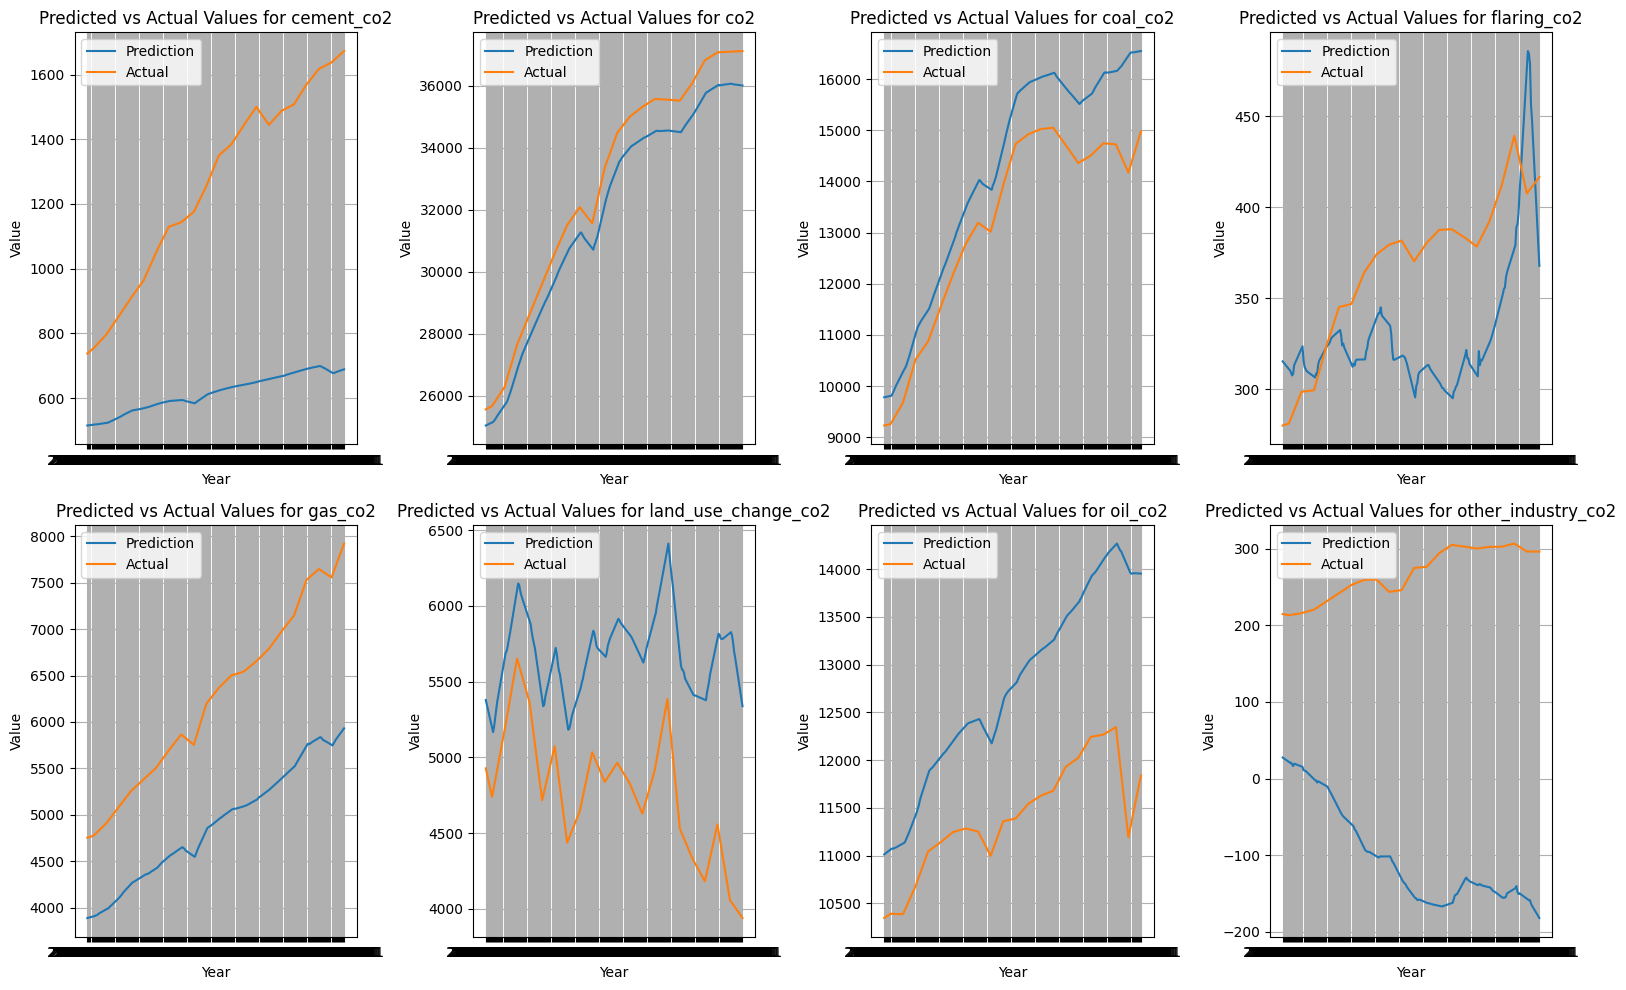

In [28]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

for idx, column in enumerate(feature_columns):
    result_df = results_of_features_df[idx]
    
    row = idx // num_cols
    col = idx % num_cols
    
    ax = axes[row, col]
    ax.plot(result_df.index, result_df['Prediction'], label='Prediction')
    ax.plot(result_df.index, result_df['Actual'], label='Actual')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(f'Predicted vs Actual Values for {column}')
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()

# Forecasting Validation on the val set

In [ ]:
val_pred = saved_model.predict(x_val)

val_feature_columns = validate_set.columns

for col_idx, column_name in enumerate(val_feature_columns):
    feature_pred = val_pred[:, col_idx]
    feature_actual = y_val[:, col_idx]

    metrics_df = print_metrics(feature_pred, feature_actual, f'Feature {column_name}')

    print(metrics_df)
    print("-" * 40)

In [ ]:
results_of_features_val = []

for idx, column in enumerate(feature_columns):
    pred_val_for_feature = val_pred[:, idx]
    y_val_for_feature = y_val[:, idx]

    result_df_val = pd.DataFrame({'Prediction': pred_val_for_feature, 'Actual': y_val_for_feature})
    result_df_val.index = validate_set.index[-5:]

    results_of_features_val.append(result_df_val)

# combining the dataframes together for the validation set
combined_results_df_val = pd.concat(results_of_features_val, axis=1, keys=feature_columns)

print(combined_results_df_val)

In [ ]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

for idx, column in enumerate(feature_columns):
    result_df = results_of_features_val[idx]
    
    row = idx // num_cols
    col = idx % num_cols
    
    ax = axes[row, col]
    ax.plot(result_df.index, result_df['Prediction'], label='Prediction')
    ax.plot(result_df.index, result_df['Actual'], label='Actual')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.set_title(f'Predicted vs Actual Values for {column}')
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()

# Ensembling of the 2 Best Models 

In [ ]:
model_a = load_model('Transformers_Best_Models_and_weights/Multivariate_best_model_weights_939.8892.hdf5')
model_b = load_model('Transformers_Best_Models_and_weights/Multivariate_best_model_weights_727.0049.hdf5')

In [ ]:
pred_a = model_a.predict(x_test)
pred_b = model_b.predict(x_test)

In [ ]:
val_pred_a = model_a.predict(x_val)
val_pred_b = model_b.predict(x_val)

In [ ]:
weight_model_a = 0.4
weight_model_b = 0.6

In [ ]:
ensemble_pred = (weight_model_a * pred_a) + (weight_model_b * pred_b)

ensemble_pred_val = ((weight_model_a * val_pred_a) + (weight_model_b * val_pred_b))

# Forecasting using the Ensembled Models

In [ ]:
print_metrics(ensemble_pred, y_test, 'Transformer_Ensembled_Scores_TEST')

In [ ]:
print_metrics(ensemble_pred_val, y_val, 'Transformer_Ensembled_Scores_val')

In [ ]:
pred_ensembled_flat = ensemble_pred.flatten()
y_test_flat = y_test.flatten()

# Create a DataFrame to compare predictions and actual values
ensembled_result_df = pd.DataFrame({'Prediction': pred_ensembled_flat, 'Actual': y_test_flat})

ensembled_result_df.index = test_set.index[-6:]

print("TEST Set:")
print("\n")
print(ensembled_result_df)

pred_ensembled_val_flat = ensemble_pred_val.flatten()
y_val_flat = y_val.flatten()

# Create a DataFrame to compare predictions and actual values
ensembled_result_val_df = pd.DataFrame({'Prediction': pred_ensembled_val_flat, 'Actual': y_val_flat})

ensembled_result_val_df.index = test_set.index[-5:]

print("\n")
print("VAL Set:")
print("\n")
print(ensembled_result_val_df)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, ensembled_result_df['Prediction'], label='Prediction')
plt.plot(result_df.index, ensembled_result_df['Actual'], label='Actual')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Test Set: Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result_df_val.index, ensembled_result_val_df['Prediction'], label='Prediction')
plt.plot(result_df_val.index, ensembled_result_val_df['Actual'], label='Actual')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Val set: Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()